In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 

In [47]:
pd.set_option('display.max_columns', None)
data = pd.read_excel('student-performance-data.xlsx')

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,higher education,higher education,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,primary education (4th grade),primary education (4th grade),at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,primary education (4th grade),primary education (4th grade),at_home,other,NaN,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,higher education,5th to 9th grade,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,secondary education,secondary education,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [48]:
data.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,higher education,primary education (4th grade),primary education (4th grade),higher education,secondary education
Fedu,higher education,primary education (4th grade),primary education (4th grade),5th to 9th grade,secondary education
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    object
 7   Fedu        649 non-null    object
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      577 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [50]:
data.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [51]:
data.isnull().sum()

school         0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason        72
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
G1             0
G2             0
G3             0
dtype: int64

Now let's understand those columns
school - student’s school (binary: ‘GP’ - Gabriel Pereira or ‘MS’ - Mousinho da Silveira)

sex - student’s sex (binary: ‘F’ - female or ‘M’ - male)

age - student’s age (numeric: from 15 to 22)

address - student’s home address type (binary: ‘U’ - urban or ‘R’ - rural)

famsize - family size (binary: ‘LE3’ - less or equal to 3 or ‘GT3’ - greater than 3)

Pstatus - parent’s cohabitation status (binary: ‘T’ - living together or ‘A’ - apart)

Medu - mother’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Fedu - father’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Mjob - mother’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

Fjob - father’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

reason - reason to choose this school (nominal: close to ‘home’, school ‘reputation’, ‘course’ preference or ‘other’)

guardian - student’s guardian (nominal: ‘mother’, ‘father’ or ‘other’)

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)



EXPORATORY DATA ANALYSIS

In [52]:
data['address'].value_counts()

U    452
R    197
Name: address, dtype: int64

In [53]:
data['famsize'].value_counts()

GT3    457
LE3    192
Name: famsize, dtype: int64

In [54]:
data['sex'].value_counts()

F    383
M    266
Name: sex, dtype: int64

In [55]:
data['internet'].value_counts()

yes    498
no     151
Name: internet, dtype: int64

In [56]:
data['paid'].value_counts()

no     610
yes     39
Name: paid, dtype: int64

In [57]:
cols_string = data.columns

In [58]:
cor_matrix=data.corr()
cor_matrix

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
traveltime,0.034490,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
Dalc,0.134768,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719
Walc,0.086357,0.057007,-0.214925,0.082266,-0.093511,0.120244,0.388680,0.616561,1.000000,0.114988,0.156373,-0.155649,-0.164852,-0.176619
health,-0.008750,-0.048261,-0.056433,0.035588,0.109559,0.084526,-0.015741,0.059067,0.114988,1.000000,-0.030235,-0.051647,-0.082179,-0.098851


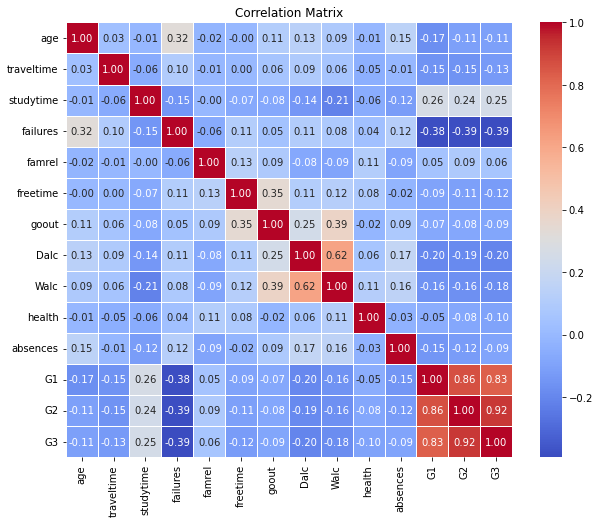

In [59]:
#visualizing the correlation matrix using heatmap

plt.figure(figsize=(10,8))
sns.heatmap(cor_matrix, annot = True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

comparing the relationships of columns with with the grades

<AxesSubplot:xlabel='G1', ylabel='G2'>

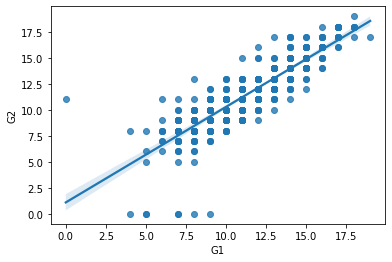

In [60]:
#comparing Grade 1 and Grade 2

sns.regplot(x="G1", y="G2", data=data)

<AxesSubplot:xlabel='G1', ylabel='G3'>

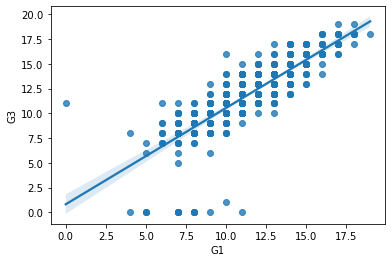

In [61]:
#comparing Grade 1 and Grade 2

sns.regplot(x="G1", y="G3", data=data)

<AxesSubplot:xlabel='G2', ylabel='G3'>

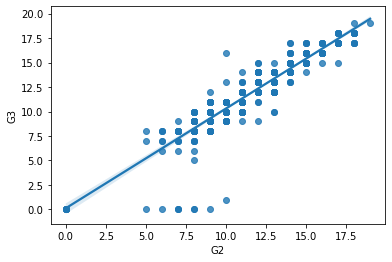

In [62]:
#comparing Grade 1 and Grade 2

sns.regplot(x="G2", y="G3", data=data)

In [63]:
data['Overall Health'] = (0.5 * data['Dalc'] + 0.5 * data['Walc'] + 2 * data['health'] + data['famrel']) / 4
data['Overall Health']

0      2.750
1      3.000
2      3.125
3      3.500
4      3.875
       ...  
644    4.125
645    1.750
646    3.000
647    2.375
648    4.375
Name: Overall Health, Length: 649, dtype: float64

[Text(0.5, 1.0, 'Overall Health vs. Grade')]

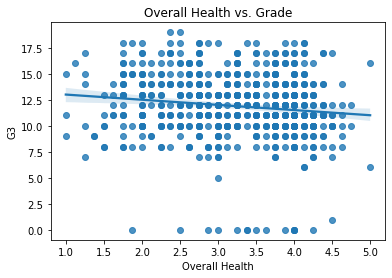

In [64]:
sns.regplot(x='Overall Health', y='G3', data=data).set(title = 'Overall Health vs. Grade')


Observations
In general better overall health value corresponds to a lower final grade. Conversely, a lower overall health value generally corresponds to a higher final grade.
The slope of the best fit line is a small distance away from zero, so the correlation between Overall Health and G3 is low.
We can explore the latter observation further by organising the plots based on the presence or absence of certain attribute

[Text(0.5, 1.0, 'absenses vs G3')]

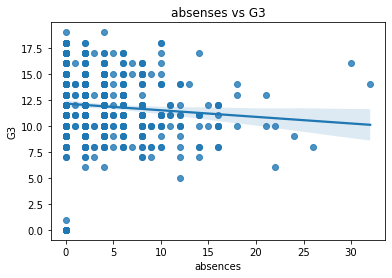

In [65]:
sns.regplot(x='absences', y='G3', data=data).set(title = 'absenses vs G3')

[Text(0.5, 1.0, 'absenses vs G1')]

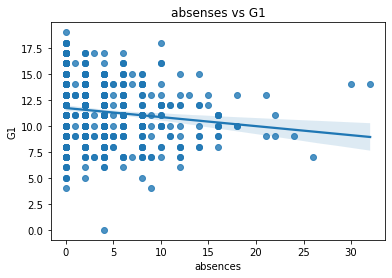

In [66]:
sns.regplot(x='absences', y='G1', data=data).set(title = 'absenses vs G1')

comparing both absence to G3 and G1 respectivly,This low correlation is because absent students (usually) revise the material missed, effectively accounting for their absence.

In [67]:
There seems to be no correlation between Absences and G3 and this is interesting we need to identify the potential cause for this phenomenon, and we need to examine more relationships on Absences to determine the cause.

SyntaxError: invalid syntax (430703228.py, line 1)

In [ ]:
sns.heatmap(data[['absences', 'G1', 'G2', 'G3']].corr(), annot=True)

The number of absences a student has does not necessarily result in a lower grade overall, as absent students typically make up the material they missed, effectively accounting for their absence.

[Text(0.5, 1.0, 'age vs G1')]

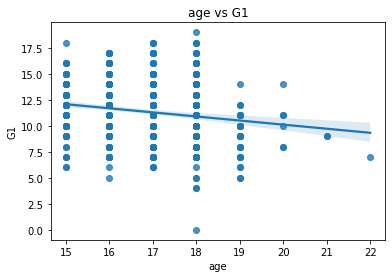

In [68]:
sns.regplot(x='age', y='G1', data=data).set(title = 'age vs G1')

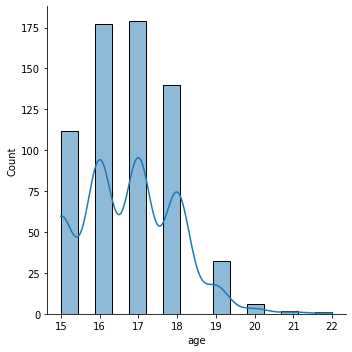

In [69]:
#age vs grade

sns.displot(data=data, x='age', kind='hist', kde= True)

In [70]:
age_grade = data.groupby('age').aggregate({'G1': 'mean', 'G2': 'mean', 'G3': 'mean'})
age_grade.reset_index(inplace = True)
age_grade

,age,G1,G2,G3
0,15,11.758929,11.830357,12.107143
1,16,11.723164,11.638418,11.994350
2,17,11.519553,11.849162,12.268156
3,18,11.200000,11.450000,11.771429
4,19,9.031250,9.312500,9.531250
5,20,10.333333,12.000000,12.000000
6,21,9.000000,11.000000,11.000000
7,22,7.000000,8.000000,5.000000


There's an inverse relationship between age and Grades
An inverse relationship between age and grades means that as one variable (age) increases, the other variable (grades) decreases, and vice versa. In mathematical terms, this is often represented by a negative correlation coefficient.

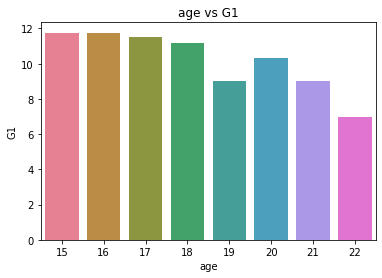

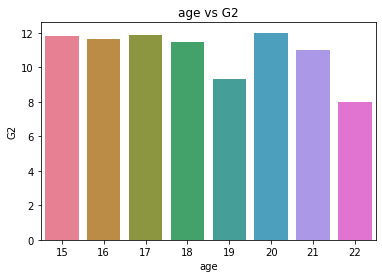

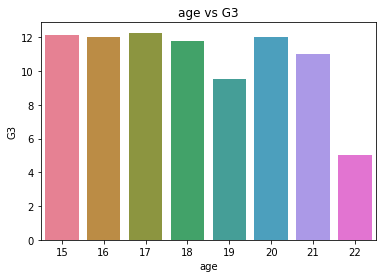

In [71]:
grades = ['G1', 'G2', 'G3']
for grade in grades:
    sns.barplot(data = age_grade, x='age', y=grade, palette='husl').set(xlabel ='age', ylabel=grade, title= f'age vs {grade}' )
    plt.show()
    
    

Conclusion
The older a person is, the lower the grades they receive are; however, twenty-year-olds (in this dataset) exhibit an outstanding performance: they lead by at least 2 whole grade points on a 19-point scale.
At the moment, we cannot make any substantiated claims as to why such a drastic increase occurs.

Time vs Grade

[Text(0.5, 1.0, 'studytime vs G1')]

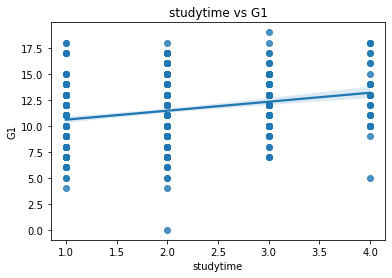

In [72]:
sns.regplot(data=data, x='studytime', y='G1').set(title='studytime vs G1')

[Text(0.5, 1.0, 'studytime vs G3')]

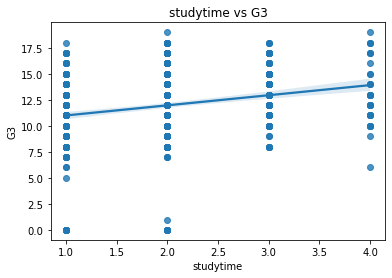

In [73]:
sns.regplot(data=data, x='studytime', y='G3').set(title='studytime vs G3')

[Text(0.5, 1.0, 'studytime vs G1')]

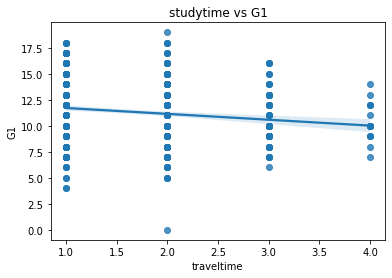

In [74]:
#TRAVEL TIME

sns.regplot(data=data, x='traveltime', y='G1').set(title='studytime vs G1')

[Text(0.5, 1.0, 'studytime vs G1')]

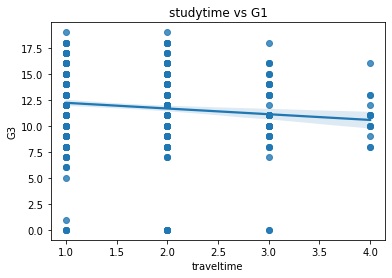

In [75]:
sns.regplot(data=data, x='traveltime', y='G3').set(title='studytime vs G1')

Students who study more score better on tests and quizzes. In contrast, students who travel more perform worse on tests and quizzes.

Conclusion
This section confirmed the obvious: students who study more receive better grades whereas students who travel more or study less receive lower grades.

JOB VS GRADE

In [76]:

motherJob_Grade = data.groupby('Mjob').aggregate({'G1':'mean', 'G2':'mean', 'G3':'mean'}).reset_index()
motherJob_Grade

,Mjob,G1,G2,G3
0,at_home,10.451852,10.711111,11.044444
1,health,12.395833,12.645833,13.062500
2,other,11.275194,11.426357,11.670543
3,services,11.610294,11.720588,12.147059
4,teacher,12.555556,12.694444,13.138889


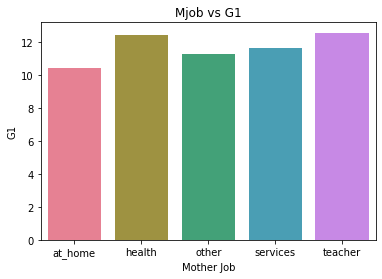

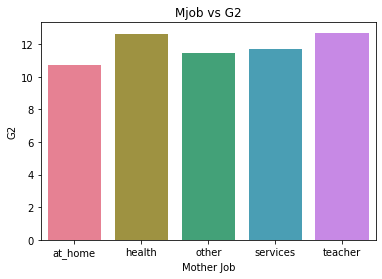

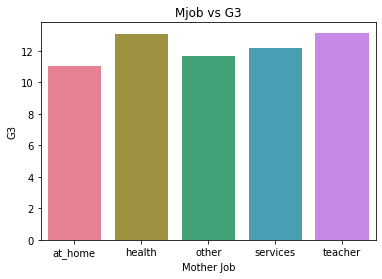

In [77]:
grades = ['G1','G2',"G3"]

for grade in grades:
    sns.barplot(data=motherJob_Grade , x='Mjob',y=grade, palette='husl' ).set(xlabel='Mother Job', ylabel=grade, title=f'Mjob vs {grade}')
    plt.show()

Its of no much surprise, students with mothers who are health care and teaching professionals receive a higher grade on average.

In [78]:
fatherJob_Grade = data.groupby('Fjob').aggregate({'G1':'mean', 'G2':'mean', 'G3':'mean'}).reset_index()
fatherJob_Grade

,Fjob,G1,G2,G3
0,at_home,10.404762,10.785714,11.428571
1,health,12.043478,12.260870,12.565217
2,other,11.362398,11.542234,11.891008
3,services,11.292818,11.370166,11.629834
4,teacher,13.055556,13.333333,13.583333


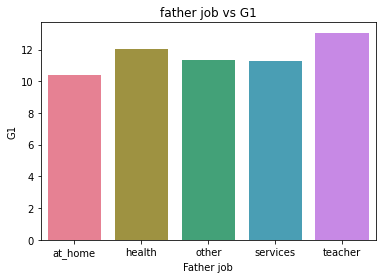

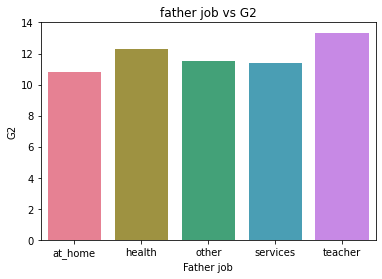

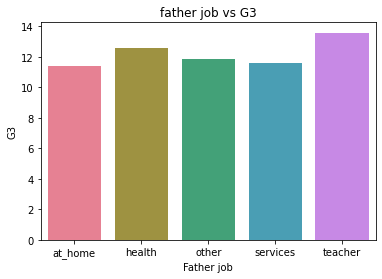

In [79]:
grades = ['G1','G2','G3']
for grade in grades:
    sns.barplot(data=fatherJob_Grade, x='Fjob', y=grade, palette='husl').set(xlabel='Father job', ylabel=grade,title=f'father job vs {grade}')
    plt.show()

 Notice that the order of these results corresponds with the order of the father's Job.
In other words, fathers with higher education levels tend to increase their children's performance more than fathers with lower education levels.
The father directly passes down his knowledge, thus cultivating the student's knowledge.
Conclusion
It seems parent in both teaching and health field tend to support their kids more in academics, because parents with such professiion 
ward perform better than the rest

ACTIVITIES VS GRADES

In [80]:
act_grade = data.groupby('activities').aggregate({'G1':'mean', 'G2':'mean','G3':'mean'}).reset_index()
act_grade

,activities,G1,G2,G3
0,no,11.185629,11.380240,11.718563
1,yes,11.625397,11.771429,12.104762


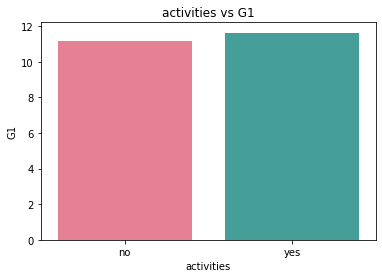

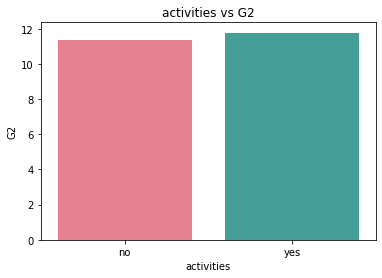

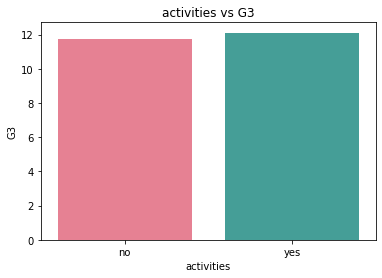

In [81]:
grades = ['G1','G2','G3']
for grade in grades:
    sns.barplot(data=act_grade, x='activities', y=grade, palette='husl').set(xlabel='activities', ylabel=grade,title=f'activities vs {grade}')
    plt.show()

People with activites receive marginally higher grades on average.
the distribution shows that, students who peform activies perform slightly better than thos who does not.

GO OUT VS GRADES

In [82]:
out_grades = data.groupby('goout').aggregate({'G1':'mean', 'G2':'mean','G3':'mean'}).reset_index()

out_grades

,goout,G1,G2,G3
0,1,10.416667,10.437500,10.729167
1,2,12.013793,12.324138,12.668966
2,3,11.634146,11.746341,12.151220
3,4,11.255319,11.524823,11.971631
4,5,10.763636,10.800000,10.872727


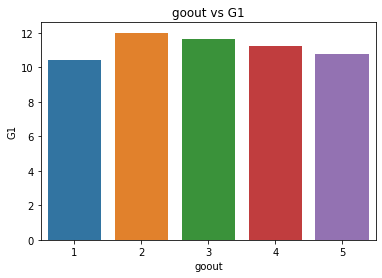

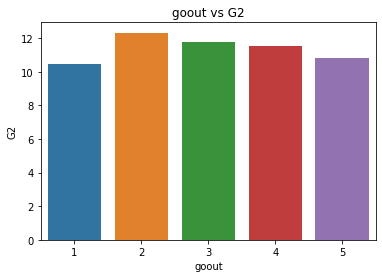

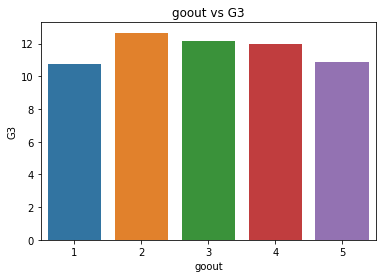

In [83]:
for grade in grades:
    sns.barplot(data=out_grades, x='goout', y=grade).set(xlabel='goout', ylabel=grade, title =f'goout vs {grade}')
    plt.show()

Overall, going out more results in an short-lived increase followed by a steep decrease in test scores.

Conclusion¶
This section portrayed a surprising relationship between how often a student engages in social activity. Students with social activity, in general, scored better than students without socialization.

On the contrary, students who went out more often tended to score on the lower side of the grade spectrum; the perfect rating in goout was 2, as it resulted in the highest average score for all scoring metrics.

STUDENT PERFORMANCE CLASSIFICATION

In [84]:
cols_string = data.columns
cols_string

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Overall Health'],
      dtype='object')

In [85]:
col_counts = dict(data.count(axis=0))
col_types = {c: d for c, d in dict(data.dtypes).items()   if col_counts[c] > 10 }
_is_num = lambda x: x in (np.int64, float)
# separate them
cols_numerical = sorted([col for col, dtp in col_types.items() if _is_num(dtp)])
cols_string = sorted([col for col, dtp in col_types.items() if not _is_num(dtp)])
print(f"NUMERICAL: {cols_numerical}")
print(f"CATEGORICAL: {cols_string}")

NUMERICAL: ['Dalc', 'G1', 'G2', 'G3', 'Overall Health', 'Walc', 'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health', 'studytime', 'traveltime']
CATEGORICAL: ['Fedu', 'Fjob', 'Medu', 'Mjob', 'Pstatus', 'activities', 'address', 'famsize', 'famsup', 'guardian', 'higher', 'internet', 'nursery', 'paid', 'reason', 'romantic', 'school', 'schoolsup', 'sex']


In [86]:
binary_cols=['Fedu', 'Fjob', 'Medu', 'Mjob', 'Pstatus', 'activities', 'address', 'famsize', 'famsup', 'guardian', 
             'higher', 'internet', 'nursery', 'paid', 'reason', 'romantic', 'school', 'schoolsup', 'sex']

In [87]:
from sklearn.preprocessing import LabelEncoder 
for i in binary_cols:
    data[i]=LabelEncoder().fit_transform(data[i])
    
    
data.head() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Overall Health
0,0,0,18,1,0,0,1,1,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11,2.750
1,0,0,17,1,0,1,3,3,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11,3.000
2,0,0,15,1,1,1,3,3,0,2,3,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12,3.125
3,0,0,15,1,0,1,1,0,1,3,1,1,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14,3.500
4,0,0,16,1,0,1,4,4,2,2,1,0,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13,3.875


In [88]:
#check if there are columns with dtype object
coulmnsOFobjectDtypes=data.select_dtypes(include='object').columns
coulmnsOFobjectDtypes

Index([], dtype='object')

In [89]:
data.isnull().sum()

school            0
sex               0
age               0
address           0
famsize           0
Pstatus           0
Medu              0
Fedu              0
Mjob              0
Fjob              0
reason            0
guardian          0
traveltime        0
studytime         0
failures          0
schoolsup         0
famsup            0
paid              0
activities        0
nursery           0
higher            0
internet          0
romantic          0
famrel            0
freetime          0
goout             0
Dalc              0
Walc              0
health            0
absences          0
G1                0
G2                0
G3                0
Overall Health    0
dtype: int64

In [90]:
data['class']=data['G3'].map(lambda x : 'F' if x<10  else ('D' if x<12 else ('C'if x<14 else ('B' if x<16 else 'A'))) )
data=data.drop(columns='G3',axis=1)
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'Overall Health', 'class'],
      dtype='object')

In [91]:
data['class'].value_counts()

D    201
C    154
B    112
F    100
A     82
Name: class, dtype: int64

In [92]:
data['class'] = data['class'].apply(str)

data['class'] = data['class'].astype('category')
print(type(data['class']))

<class 'pandas.core.series.Series'>


<AxesSubplot:xlabel='class', ylabel='count'>

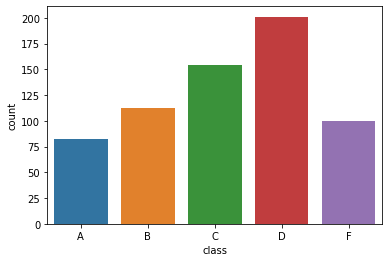

In [93]:
sns.countplot(x=data['class'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='G2', ylabel='Density'>

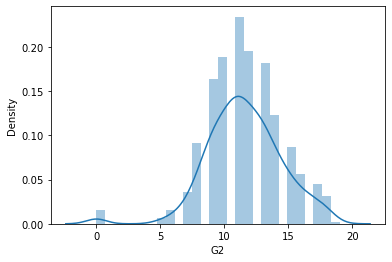

In [94]:
sns.distplot(data['G2'],hist=True)

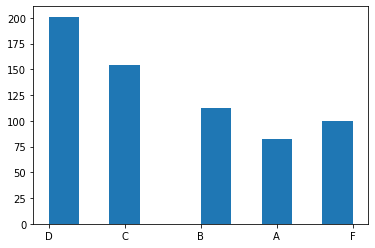

In [95]:
plt.hist(data['class'])
plt.show()

In [96]:
data.describe(include = 'all').round().T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,649.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0
sex,649.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0
age,649.0,NaN,NaN,NaN,17.0,1.0,15.0,16.0,17.0,18.0,22.0
address,649.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,1.0,1.0
famsize,649.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Pstatus,649.0,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Medu,649.0,NaN,NaN,NaN,2.0,2.0,0.0,0.0,1.0,3.0,4.0
Fedu,649.0,NaN,NaN,NaN,2.0,2.0,0.0,0.0,1.0,3.0,4.0
Mjob,649.0,NaN,NaN,NaN,2.0,1.0,0.0,1.0,2.0,3.0,4.0
Fjob,649.0,NaN,NaN,NaN,2.0,1.0,0.0,2.0,2.0,3.0,4.0


In [97]:
X = data.drop(columns = 'class', axis=1)
y = data['class']

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [99]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 )
model =DecisionTreeClassifier(max_depth = 6).fit(X_train,y_train)
y_pred = model.predict(X_train)

print('train accuracy', model.score(X_train,y_train))

train accuracy 0.8631984585741811


In [107]:
print("test accuracy",accuracy_score(y_test,y_pred))

test accuracy 0.7


In [101]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier().fit(X_train , y_train)#min_samples_split=4,max_depth=6,n_estimators = 100
y_pred2=model2.predict(X_test)
print("train accuracy : ",model2.score(X_train , y_train))
print("accuracy score : ", accuracy_score(y_test, y_pred2))

train accuracy :  1.0
accuracy score :  0.7615384615384615


let`s start with feature selection
the selected features the age of the student, mother’s education, father’s education, mother’s occupation, student study time, number of past class failures, plan for higher education, number of school absences and first and second period grades.

In [105]:
X=X[['age', 'Medu', 'Fedu',
      'studytime', 'failures','higher', 'absences', 'G1', 'G2',
       'Mjob']]#, 'Mjob_health', 'Mjob_other', 'Mjob_services','Mjob_teacher'
print(X.head())

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model=DecisionTreeClassifier(max_depth=6).fit(x_train , y_train)
y_pred=model.predict(x_test)
print("train accuracy",model.score(x_train , y_train))
print("test accuracy",accuracy_score(y_test,y_pred))

   age  Medu  Fedu  studytime  failures  higher  absences  G1  G2  Mjob
0   18     1     1          2         0       1         4   0  11     0
1   17     3     3          2         0       1         2   9  11     0
2   15     3     3          2         0       1         6  12  13     0
3   15     1     0          3         0       1         0  14  14     1
4   16     4     4          2         0       1         0  11  13     2
train accuracy 0.8516377649325626
test accuracy 0.7


In [106]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(min_samples_split=4,max_depth=6,n_estimators = 100).fit(x_train , y_train)#min_samples_split=4,max_depth=6,n_estimators = 100
y_pred2=model2.predict(x_test)
print("train accuracy : ",model2.score(x_train , y_train))
print("accuracy score : ", accuracy_score(y_test, y_pred2))

train accuracy :  0.8458574181117534
accuracy score :  0.7076923076923077
